<h1 align="center"><font size="5">EDA for Automobile Data"Price"</font></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

# Đọc dữ liệu

In [3]:
data=pd.read_csv('data/Automobile_data.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# Thống kê tập dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Làm sạch dữ liệu

In [6]:
for col in data.columns:
    if "?" in data[col].unique():
        print(col,'(',len(data[col].unique()),'): ',data[col].unique(),'\n')

normalized-losses ( 52 ):  ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95'] 

num-of-doors ( 3 ):  ['two' 'four' '?'] 

bore ( 39 ):  ['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '?' '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01'] 

stroke ( 37 ):  ['2.68' '3.47' '3.4' '2.8' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46' '3.9'
 '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' '?' '3.16' '3.64' '3.1' '3.35'
 '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.9' '2.07' '2.36'
 '2.64' '3.08' '3.5' '3.54' '2.87'] 

horsepower ( 60 ):  ['111' '154' '102' '115' '110' '140' '160' '101'

### Nhận xét:
* Có nhiều cột chứa Missing Values.
* Các cột bore, stroke, peak-rpm, horsepower, price bị sai kiểu dữ liệu.

In [7]:
# Kiểm tra Duplicated Values
dups=data.duplicated()
print(dups.any())

False


### Thay '?' bằng NaN

In [8]:
data=data.replace('?',np.NaN)
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Xử lý NaN

### Xử lý cột normalized-losses

In [9]:
normalised_mean = data['normalized-losses'].dropna().astype(int).mean()
data['normalized-losses'] = data['normalized-losses'].replace(np.NaN,normalised_mean).astype(int)

### Xử lý cột bore

In [10]:
bore_mean = data['bore'].dropna().astype(float).mean()
data['bore'] = data['bore'].replace(np.NaN,bore_mean).astype(float)

### Xử lý cột stroke

In [11]:
stroke_mean = data['stroke'].dropna().astype(float).mean()
data['stroke'] = data['stroke'].replace(np.NaN,stroke_mean).astype(float)

### Xử lý cột horsepower

In [12]:
horse_mean = data['horsepower'].dropna().astype(int).mean()
data['horsepower'] = data['horsepower'].replace(np.NaN,horse_mean).astype(int)

### Xử lý cột peak-rpm

In [13]:
peak_mean = data['peak-rpm'].dropna().astype(int).mean()
data['peak-rpm'] = data['peak-rpm'].replace(np.NaN,peak_mean).astype(int)

### Xử lý cột price

In [14]:
price_mean = data['price'].dropna().astype(int).mean()
data['price'] = data['price'].replace(np.NaN,price_mean).astype(int)

### Xử lý cột num-of-doors

In [15]:
door_mode = data['num-of-doors'].dropna().mode()
data['num-of-doors'] = data['num-of-doors'].replace(np.NaN,door_mode[0])

# Phân tích dữ liệu 

### Biểu đồ 10 hãng sản xuất nhiều dòng xe nhất

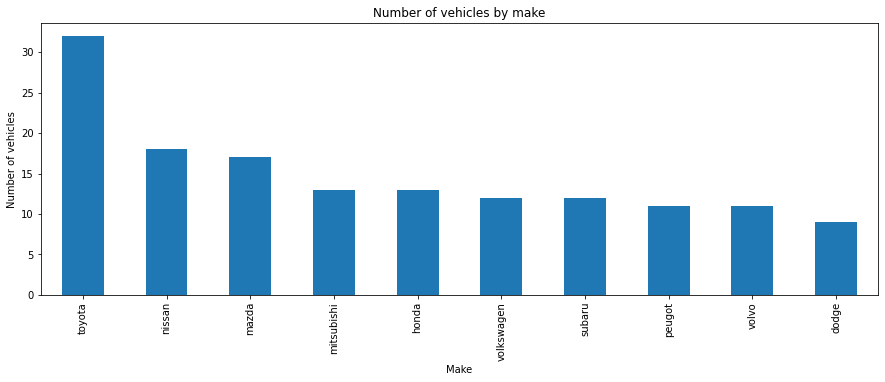

In [16]:
data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Nhận xét:
* Toyota là hãng sản xuất nhiều dòng xe nhất, hơn vị trí thứ 2 là hãng xe nissan tới hơn 40%

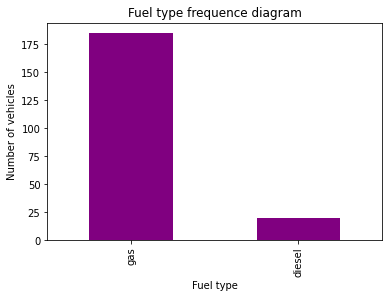

In [23]:
data['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Nhận xét:
* Hơn 80% các dòng xe sử dụng nhiên liệu gas hơn dầu diesel

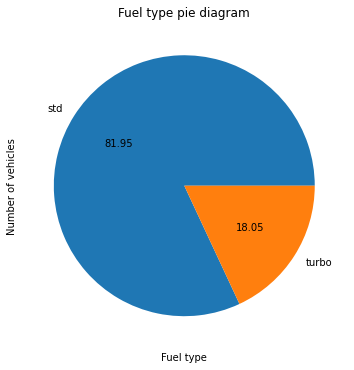

In [24]:
data['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Nhận xét:
* Hơn 80% xe sử dụng động std, chỉ 18% sử dụng động cơ turbo

## Phân tích độ tương quan

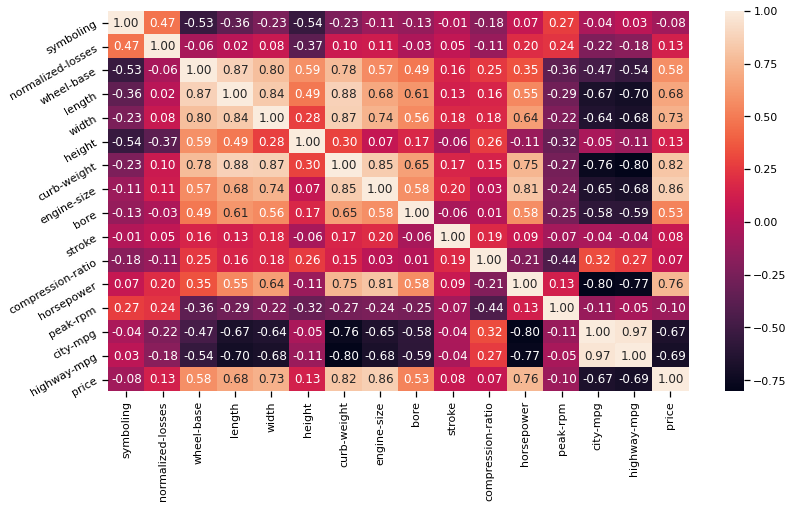

In [25]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Nhận xét:
* Cột price có độ tương quan cao với curb-weight và engine-size => trọng lượng xe càng nặng và động cơ càng lớn thì giá xe càng cao
* curb-weight có độ tương quan cao với length, width, engine-size => điều này là hợp lý vì chiều cao, chiều rộng và động cơ càng lớn thì trọng lượng càng cao

## Biểu đồ Boxplot giá các hãng xe

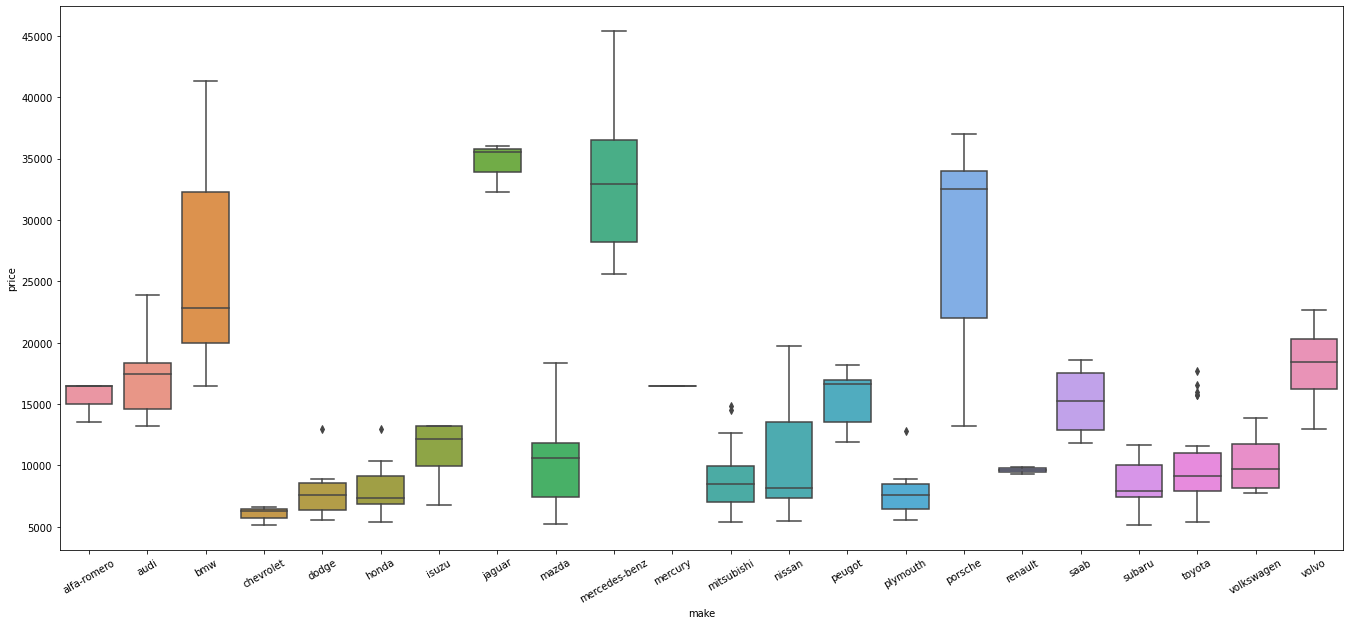

In [18]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=data)
roty = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

### Nhận xét:
* Hãng mercedes-benz là hãng xe có giá mắc nhất, còn hãng chevrolet là hãng có giá rẻ nhất
* Hãng bmw và porsche là 2 hãng có range giá khá rộng, trải dài từ mức giá rẻ đến mắc => có nhiều sự lựa chọn cho người dùng
* Hãng toyota và nissan là 2 hãng có nhiều dòng xe nhất nhưng giá thành lại khá rẻ 
* Phần lớn các hãng xe có giá dao động từ 5000 - 20000 